In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

goderich sl
grand gaube mu
rikitea pf
paraiso mx
sinnamary gf
valparaiso cl
mataura pf
san matias bo
new norfolk au
biak id
umm bab qa
torbay ca
ushuaia ar
rikitea pf
broome au
nizhneyansk ru
corner brook ca
conde br
kushiro jp
guerrero negro mx
saint-philippe re
norman wells ca
sur om
jamestown sh
voronezhskaya ru
hobart au
mavelikara in
dikson ru
brae gb
oranjestad an
new norfolk au
rikitea pf
goderich sl
itarema br
hermanus za
tura ru
richards bay za
vilyuysk ru
adrar dz
port alfred za
jamestown sh
ribeira grande pt
hobart au
mataura pf
hithadhoo mv
miandrivazo mg
buariki ki
kodiak us
tessalit ml
castro cl
panzhihua cn
illoqqortoormiut gl
nikolskoye ru
pevek ru
punta arenas cl
port alfred za
srednekolymsk ru
atuona pf
busselton au
qaanaaq gl
tanete id
kaitangata nz
kudahuvadhoo mv
butaritari ki
buala sb
esna eg
katobu id
constitucion mx
belushya guba ru
bluff nz
clyde river ca
makakilo city us
hobart au
leningradskiy ru
saint-philippe re
chokwe mz
rolla us
port blair in
victor harbo

hilo us
marsh harbour bs
barrow us
chaozhou cn
coquimbo cl
kyaikto mm
punta arenas cl
carballo es
saint-philippe re
taolanaro mg
lompoc us
hilo us
dunedin nz
yumen cn
vaini to
traverse city us
aklavik ca
cabo san lucas mx
rikitea pf
kapaa us
jamestown sh
guiratinga br
kodiak us
klaksvik fo
port elizabeth za
mataura pf
bethel us
clarence town bs
bredasdorp za
cape town za
yellowknife ca
sungaipenuh id
kodiak us
paarl za
ribeira grande pt
igarka ru
nemuro jp
cape town za
codrington ag
kautokeino no
airai pw
cabo san lucas mx
kapoeta sd
atuona pf
vardo no
punta arenas cl
vila velha br
nizhneyansk ru
butaritari ki
mataura pf
rikitea pf
meyungs pw
santa marta co
hermanus za
airai pw
butaritari ki
taolanaro mg
mataura pf
nanortalik gl
ishigaki jp
karoi zw
vao nc
padang id
norman wells ca
rikitea pf
albany au
kabanjahe id
keflavik is
maumere id
east london za
baishishan cn
aklavik ca
beatrice us
sistranda no
wagrowiec pl
lebu cl
ponta do sol cv
yar-sale ru
guerrero negro mx
hermanus za
bussel

cape town za
bluff nz
barinas ve
atuona pf
cayenne gf
carson city us
victoria sc
kodiak us
sangmelima cm
kodiak us
bengkulu id
rikitea pf
puerto ayora ec
qaanaaq gl
barentsburg sj
bambous virieux mu
sembakung id
avarua ck
souillac mu
kavaratti in
hilo us
port alfred za
yellowknife ca
kodiak us
khatanga ru
isangel vu
carroll us
bambous virieux mu
sao borja br
mayo ca
ushuaia ar
bethel us
aklavik ca
sinnamary gf
thompson ca
arraial do cabo br
kuching my
kabalo cd
albany au
ushuaia ar
grand river south east mu
sao filipe cv
punta arenas cl
atuona pf
georgetown sh
sitka us
kapaa us
benxi cn
tenkodogo bf
ushuaia ar
grand island us
busselton au
hermanus za
sinnamary gf
vaitape pf
nanortalik gl
jamestown sh
hobart au
chokurdakh ru
ushuaia ar
faanui pf
cidreira br
akhmim eg
bambous virieux mu
saint anthony ca
rikitea pf
vila franca do campo pt
khatanga ru
hilo us
kasempa zm
albany au
bhatkal in
taolanaro mg
rikitea pf
bethel us
high prairie ca
goderich sl
puerto ayora ec
qaanaaq gl
castro cl
a

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [12]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through cities in list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create URL endpoint for city
    city_url = url + '&q=' + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | goderich
Processing Record 2 of Set 1 | grand gaube
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | paraiso
Processing Record 5 of Set 1 | sinnamary
Processing Record 6 of Set 1 | valparaiso
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | san matias
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | biak
Processing Record 11 of Set 1 | umm bab
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | broome
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | corner brook
Processing Record 17 of Set 1 | conde
Processing Record 18 of Set 1 | kushiro
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | norman wells
Processing Record 22 of Set 1 | sur
Process

Processing Record 39 of Set 4 | cherskiy
Processing Record 40 of Set 4 | korla
Processing Record 41 of Set 4 | dingle
Processing Record 42 of Set 4 | kodinsk
Processing Record 43 of Set 4 | poddorye
Processing Record 44 of Set 4 | sibu
Processing Record 45 of Set 4 | tucumcari
Processing Record 46 of Set 4 | amapa
Processing Record 47 of Set 4 | zhigalovo
Processing Record 48 of Set 4 | melo
Processing Record 49 of Set 4 | susa
Processing Record 50 of Set 4 | lardos
Processing Record 1 of Set 5 | necochea
Processing Record 2 of Set 5 | aswan
Processing Record 3 of Set 5 | inirida
Processing Record 4 of Set 5 | cape town
Processing Record 5 of Set 5 | paradwip
City not found. Skipping...
Processing Record 6 of Set 5 | acarau
Processing Record 7 of Set 5 | sumbe
Processing Record 8 of Set 5 | male
Processing Record 9 of Set 5 | imeni poliny osipenko
Processing Record 10 of Set 5 | khatanga
Processing Record 11 of Set 5 | tazovskiy
Processing Record 12 of Set 5 | victoria
Processing Recor

Processing Record 31 of Set 8 | upernavik
Processing Record 32 of Set 8 | aktash
Processing Record 33 of Set 8 | vestmannaeyjar
Processing Record 34 of Set 8 | sao filipe
Processing Record 35 of Set 8 | lolua
City not found. Skipping...
Processing Record 36 of Set 8 | talnakh
Processing Record 37 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 8 | karratha
Processing Record 39 of Set 8 | wanaka
Processing Record 40 of Set 8 | saint-georges
Processing Record 41 of Set 8 | ajdabiya
Processing Record 42 of Set 8 | kifri
Processing Record 43 of Set 8 | sampit
Processing Record 44 of Set 8 | eydhafushi
Processing Record 45 of Set 8 | general pico
Processing Record 46 of Set 8 | chagda
City not found. Skipping...
Processing Record 47 of Set 8 | petatlan
Processing Record 48 of Set 8 | pokhara
Processing Record 49 of Set 8 | muros
Processing Record 50 of Set 8 | hommelvik
Processing Record 1 of Set 9 | manggar
Processing Record 2 of Set 9 | beloha
Processing Record

Processing Record 18 of Set 12 | nishihara
Processing Record 19 of Set 12 | nivala
Processing Record 20 of Set 12 | ko samui
Processing Record 21 of Set 12 | magog
Processing Record 22 of Set 12 | xique-xique
Processing Record 23 of Set 12 | barinas
Processing Record 24 of Set 12 | carson city
Processing Record 25 of Set 12 | sangmelima
Processing Record 26 of Set 12 | sembakung
Processing Record 27 of Set 12 | carroll
Processing Record 28 of Set 12 | sao borja
Processing Record 29 of Set 12 | mayo
Processing Record 30 of Set 12 | kuching
Processing Record 31 of Set 12 | kabalo
Processing Record 32 of Set 12 | benxi
Processing Record 33 of Set 12 | tenkodogo
Processing Record 34 of Set 12 | grand island
Processing Record 35 of Set 12 | vaitape
Processing Record 36 of Set 12 | akhmim
Processing Record 37 of Set 12 | saint anthony
Processing Record 38 of Set 12 | kasempa
Processing Record 39 of Set 12 | bhatkal
Processing Record 40 of Set 12 | high prairie
Processing Record 41 of Set 12 

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Goderich,43.7501,-81.7165,68.04,59,31,9.22,CA,2021-09-18 15:30:44
1,Grand Gaube,-20.0064,57.6608,72.37,81,16,12.68,MU,2021-09-18 15:32:15
2,Rikitea,-23.1203,-134.9692,71.53,80,100,12.66,PF,2021-09-18 15:32:16
3,Paraiso,9.8383,-83.8656,78.89,60,76,4.16,CR,2021-09-18 15:32:16
4,Sinnamary,5.3833,-52.9500,83.55,75,16,7.36,GF,2021-09-18 15:32:16
5,Valparaiso,-33.0393,-71.6273,62.83,66,20,5.75,CL,2021-09-18 15:32:17
6,Mataura,-46.1927,168.8643,39.47,99,72,3.53,NZ,2021-09-18 15:32:17
7,San Matias,-16.3667,-58.4000,107.44,14,45,6.44,BO,2021-09-18 15:32:17
8,New Norfolk,-42.7826,147.0587,45.91,77,100,1.01,AU,2021-09-18 15:32:17
9,Biak,-0.9131,122.8766,74.95,82,96,5.73,ID,2021-09-18 15:32:18


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
# today = time.time()
# today

In [21]:
# # get today's time in seconds
today = time.strftime("%x")
today

'09/18/21'

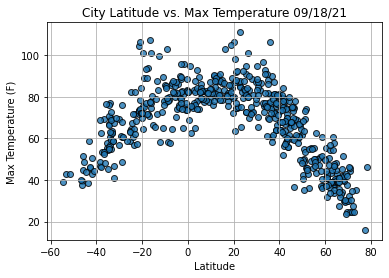

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

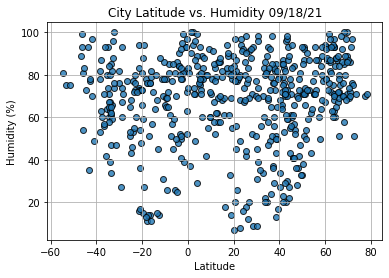

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

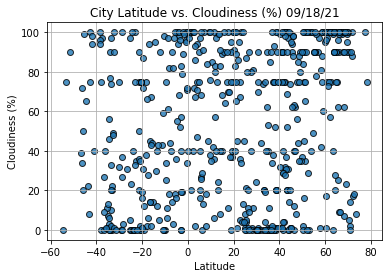

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

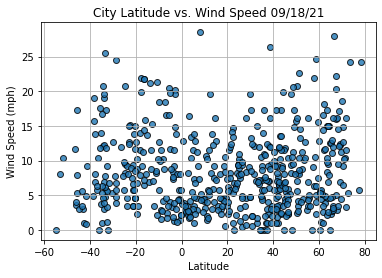

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [27]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                       Broome
Lat                       42.2506
Lng                       -75.833
Max Temp                    78.21
Humidity                       70
Cloudiness                     75
Wind Speed                   1.01
Country                        US
Date          2021-09-18 15:32:19
Name: 13, dtype: object

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

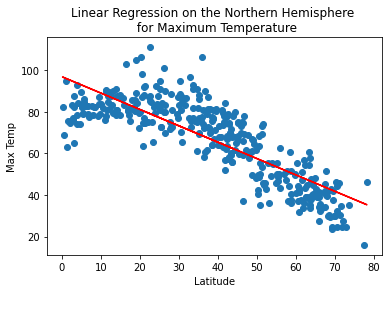

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-20))

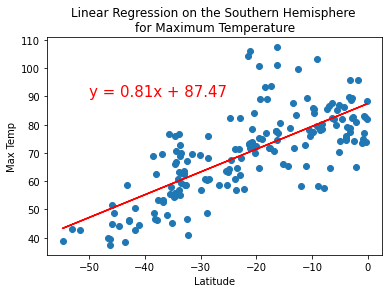

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

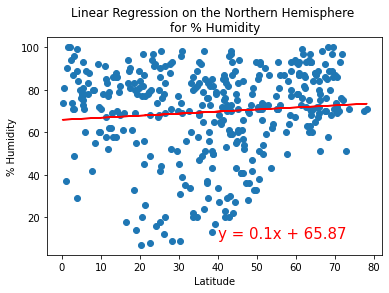

In [32]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

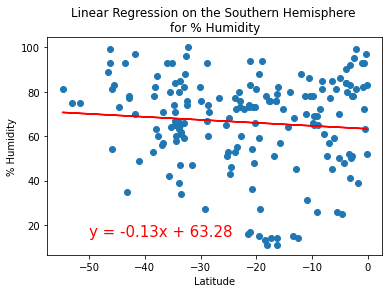

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

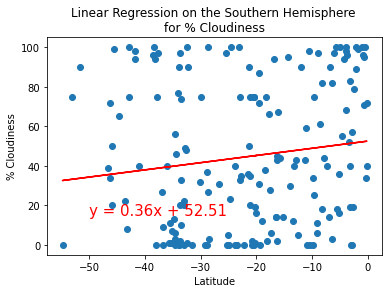

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))

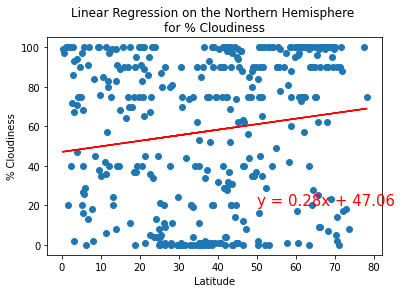

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(50,20))

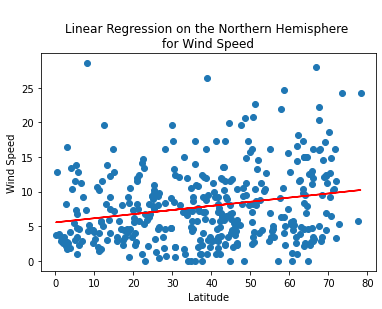

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

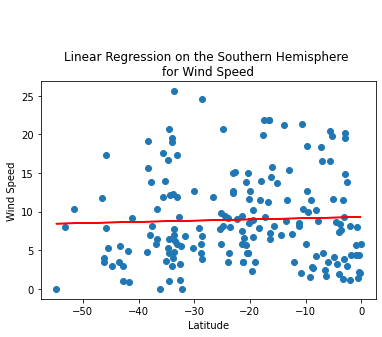

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))